In [1]:
using UMAP
using MLDatasets
using Plots
using BenchmarkTools
using Statistics
pyplot()

┌ Info: Recompiling stale cache file /home/dillon/.julia/compiled/v1.0/UMAP/VBM6H.ji for UMAP [bfa8c4a0-b777-11e8-1650-5d8029af211b]
└ @ Base loading.jl:1190


Plots.PyPlotBackend()

In [2]:
reshape_mnist(data) = reshape(data, size(data)[1]*size(data)[2], size(data)[3])
MNIST_train, MNIST_train_y = MNIST.traindata()
MNIST_train = reshape_mnist(MNIST_train)
MNIST_data_x = [convert.(Float64, MNIST_train[:,i]) for i = 1:5000]
MNIST_data_y = MNIST_train_y[1:5000];

In [3]:
umap = @btime UMAP_(MNIST_data_x, 10, 2, 0.001; init=:random);

  32.270 s (417572725 allocations: 32.93 GiB)


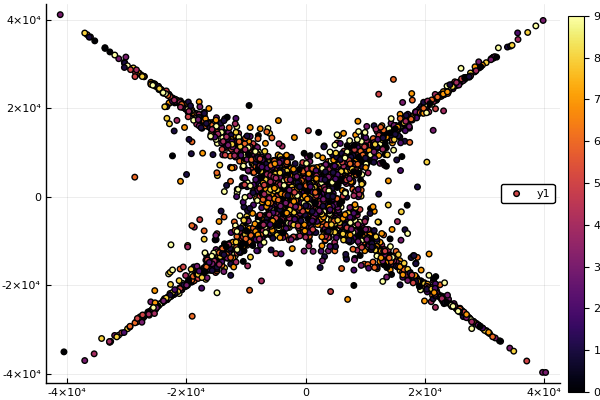

In [4]:
x = umap.embedding[1,:]
y = umap.embedding[2,:]
scatter(x, y, zcolor=MNIST_data_y)

  29.075 s (417308834 allocations: 32.99 GiB)


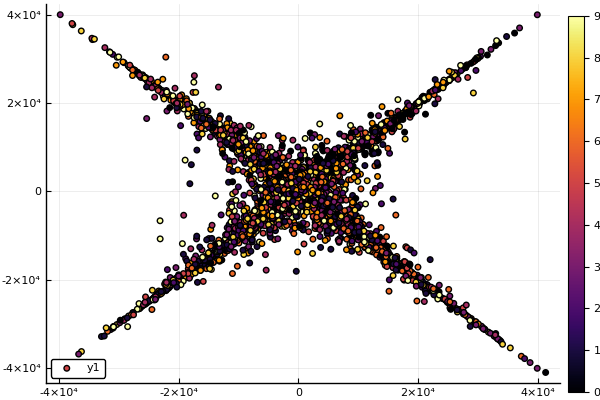

In [7]:
umap2 = @btime UMAP_(MNIST_data_x, 10, 2, 0.001; init=:spectral)
x2 = umap2.embedding[1, :]
y2 = umap2.embedding[2, :]
scatter(x2, y2, zcolor=MNIST_data_y)